# Firli Ilhami
## AB Testing 
## Objective
A/B tests also known as split testing or bucket testing are the way to test hypotheses for improving a page, attracting and retaining customers.

You can achieve the following results:

* improvement of your online store usability;
* smaller numbers of users who leave your site;
* acceleration of the process of making purchasing decisions.

Goal: To understand if a difference between
two versions is statistically significant
## Import Library

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset
## Data Understanding
Our dataset is about e-commerce website. They want to know about old page and new page impact for customer. Does customer buy their product or not.
There are several features in our dataset:
* user_id 
* timestamp : the time when user click our page
* group  : group of user ( for A/B Testing)
* landing_page : display of webpage ( old page or new page)
* converted :
    * 0 : don't buy product
    * 1 : buy product

In [4]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.shape

(294478, 5)

In [6]:
df.user_id.nunique()

290584

We can see that nunique number is not same with number of rows. We noticed user visiting records with the same user_id got duplicated

#### Proportion of  Users Converted

In [7]:
"%.4f" % (df.converted.sum() / df.converted.count())

'0.1197'

#### Missing Value
There is no missing value in our dataset

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [9]:
#df2 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')]
df2 = df.query("group == 'treatment' & landing_page == 'new_page'")
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [10]:
# Double Check all of the corresponding rows were removed - this should be 0
df2[((df2['group'] == 'treatment') & (df2['landing_page'] == 'new_page')) == False].shape[0]

0

## Data Preparation

In [11]:
#Remove Duplicate Value
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [12]:
# Given that an individual was in the control group, the probability converted
obs_old = df.query('group == "control"')['converted'].sum() / \
        df.query('group == "control"')['converted'].count()
'%.4f' % obs_old

'0.1204'

In [13]:
# Given that an individual was in the treatment group, the probability converted
obs_new = df.query('group == "treatment"')['converted'].sum() / \
df.query('group == "treatment"')['converted'].count()
'%.4f' % obs_new

'0.1189'

# A/B Testing
## Hypothesis Testing
p_new  - p_old means the differences in converted success rate between the two pages.<br>
* H0：p_old=p_new
* H1：p_old≠p_new

Assume under the null hypothesis, p_new and p_old both have "true" success rates equal to the converted success rate regardless of page - that is p_new and p_old are equal. Furthermore, assume they are equal to the converted rate in ab_data.csv regardless of the page.
Use a sample size for each page equal to the ones in ab_data.csv. Perform the sampling distribution for the difference in converted between the two pages over 10,000 iterations of calculating an estimate from the null.

## Calculating Manual

In [14]:
#convert rate for  pnew  under the null
null_rate = df['converted'].sum() / df.shape[0]
null_rate

0.11965919355605512

In [15]:
df.drop_duplicates(subset='user_id', keep='first', inplace=True)
# Use a sample size for each page equal to the ones in ab_data1.csv. 
df.groupby('landing_page').count()['user_id']

landing_page
new_page    145320
old_page    145264
Name: user_id, dtype: int64

In [16]:
n_new,n_old=145320,145264

In [17]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null. Store these  n_new  1's and 0'
new_page_converted = np.random.choice(2,n_new,p=[1-null_rate,null_rate])
new_page_converted

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [18]:
#Simulate  n_old  transactions with a convert rate of  p_old  under the null. Store these  nold  1's and 0's
old_page_converted = np.random.choice(2,n_old,p=[1-null_rate,null_rate])
old_page_converted

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
#p_new - p_old
new_page_converted.sum() / n_new - old_page_converted.sum() / n_old

0.0012202140873908973

In [20]:
# Simulate 10,000  p_new  -  p_old  values using this same process similarly to the one you calculated in parts a. through g. above. Store all 10,000 values in a numpy array called p_diffs.
p_diffs = []
# bootstrap sampling with python, several minites may cost
for _ in range (10000):
    bootstrap_new = np.random.choice(2,n_new,p=[1-null_rate,null_rate])
    bootstrap_old = np.random.choice(2,n_old,p=[1-null_rate,null_rate])
    p_new = bootstrap_new.sum() /n_new
    p_old = bootstrap_old.sum() / n_old
    p_diffs.append(p_new - p_old)
    
# convert list to array
p_diffs = np.array(p_diffs)


In [21]:
# convert list to array
p_diffs = np.array(p_diffs)

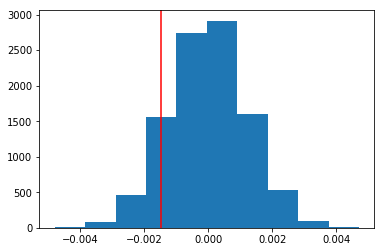

In [22]:
plt.hist(p_diffs)
obs_diff = obs_new-obs_old
plt.axvline(x = obs_diff,color='red')

In [23]:
# Caculating P-value
p=(p_diffs > obs_diff).mean()

print('P-value = '+str(p))

P-value = 0.8888


### Result Manual Calculating

The result P-value is 0.8888. If we take alpha = 0.05. <br>
P-value is greater than 0.05, so we accept Null Hypothesis.<br>
It means the old page have higher or equal converted rate than new page in 88.88% probability.

Based on A/B Testing, I will not recommend this e-commerce to change their webpage, because there is no significant changes if we change the webpage to the new page. Even the old page will give more convertion rate. 


## Using Built-in feature to do A/B Testing

In [24]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
convert_old = df.query('landing_page == "old_page"')['converted'].sum()
convert_new = df.query('landing_page == "new_page"')['converted'].sum()

## Using stats.proportions_ztes

In [26]:
z_score, p_value = sm.stats.proportions_ztest\
([convert_new,convert_old],[n_new, n_old],alternative='larger')
print('Z-Score = '+str(z_score))
print('Z-Score = '+ str(p_value))

Z-Score = -1.3704617576931086
Z-Score = 0.9147285973840954


### Result Built-in
The result P-value is 0.9147. If we take alpha = 0.05.
P-value is greater than 0.05, so we accept Null Hypothesis.
It means the old page have higher or equal converted rate than new page in 91.47% probability.

Based on A/B Testing, I will not recommend this e-commerce to change their webpage, because there is no significant changes if we change the webpage to the new page. Even the old page will give more convertion rate

# Conclusion
Both of method ( manual or buil-in ) give the same result. The result is accept Null Hypothesis, but give these methods give different score P-value. :
* Calculating Manual = 0.8888
* Built - in = 0.9147

Based on A/B Testing, it is not recommended this e-commerce to change their webpage, because there is no significant changes if we change the old page to the new page. Even the old page will give more convertion rate